<a href="https://colab.research.google.com/github/AngelTroncoso/ML_Alura/blob/main/4_Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [81]:
import pandas as pd

datos = pd.read_csv("/content/precios_casas.csv")
datos.head()

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [82]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [83]:
datos.columns

Index(['Id', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [84]:
# Correlación
corr = datos.corr()
corr

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
Id,1.000000,0.001384,0.014623,0.003465,0.003898,0.013251,-0.014236,-0.024351
area_primer_piso,0.001384,1.000000,-0.376805,-0.253793,0.369368,0.481231,0.323496,0.616557
tiene_segundo_piso,0.014623,-0.376805,1.000000,0.917101,0.292780,-0.001284,-0.020045,0.138541
area_segundo_piso,0.003465,-0.253793,0.917101,1.000000,0.412777,0.131938,0.025248,0.305311
cantidad_banos,0.003898,0.369368,0.292780,0.412777,1.000000,0.409281,0.154102,0.563132
capacidad_carros_garage,0.013251,0.481231,-0.001284,0.131938,0.409281,1.000000,0.276759,0.640214
calidad_de_cocina_excelente,-0.014236,0.323496,-0.020045,0.025248,0.154102,0.276759,1.000000,0.496223
precio_de_venta,-0.024351,0.616557,0.138541,0.305311,0.563132,0.640214,0.496223,1.000000


In [85]:
corr['precio_de_venta']

,precio_de_venta
Id,-0.024351
area_primer_piso,0.616557
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
cantidad_banos,0.563132
capacidad_carros_garage,0.640214
calidad_de_cocina_excelente,0.496223
precio_de_venta,1.000000


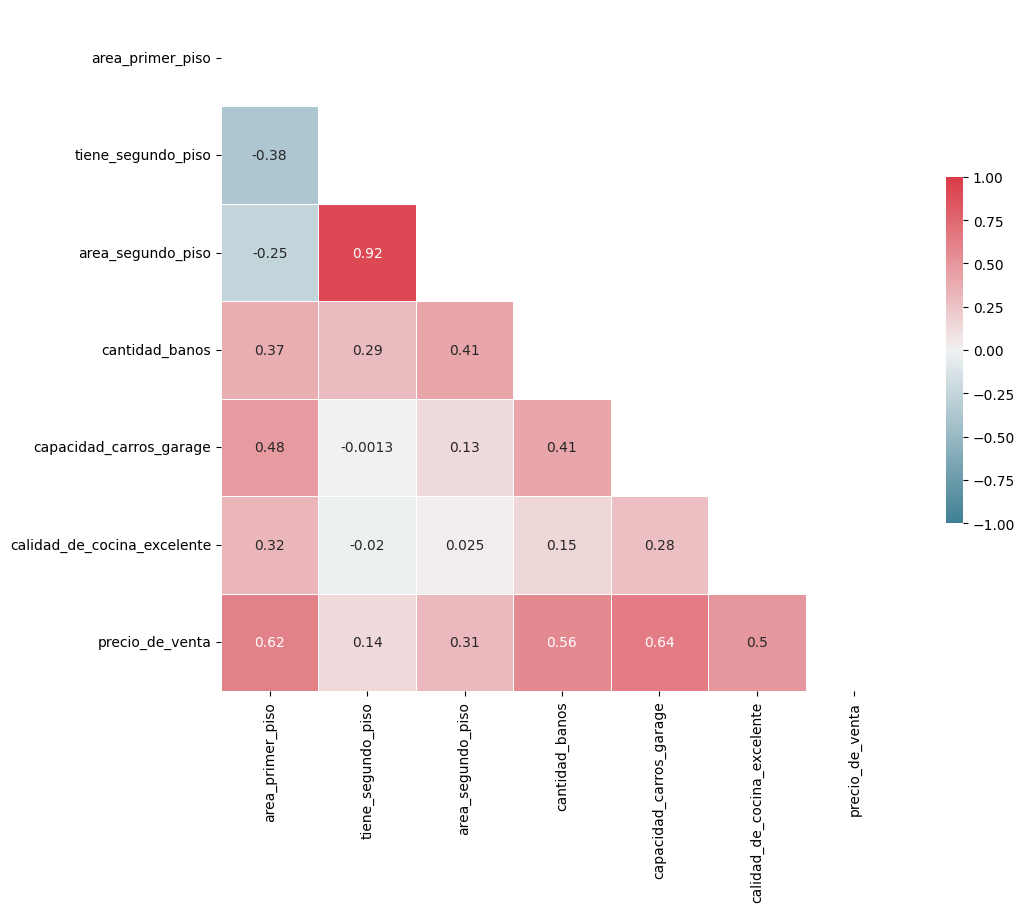

In [86]:
# Actividad
# Cuáles factores están más correlacionados?
# Actividad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leyendo datos
datos = pd.read_csv("/content/precios_casas.csv")
datos = datos.drop(columns = "Id")

# Correlación
corr = datos.corr()

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

## Relacionando variables

In [87]:
# importando los paquetes para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

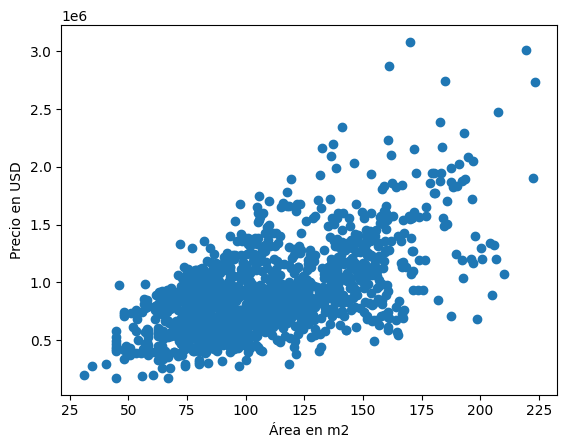

In [88]:
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])
plt.xlabel('Relación entre el precio y el área')
plt.ylabel('Precio en USD')
plt.xlabel('Área en m2')
plt.show()

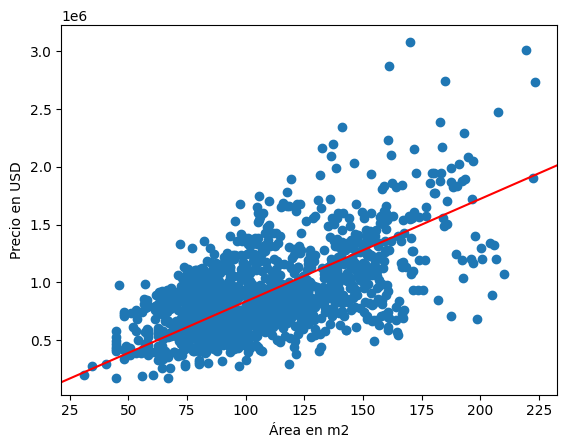

In [89]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])
plt.axline(xy1=(40,300000),xy2=(175,1500000),color='red')
plt.xlabel('Relación entre el precio y el área')
plt.ylabel('Precio en USD')
plt.xlabel('Área en m2')
plt.show()

## Mejor recta

In [90]:
# Cuál es la recta que mejor se ajusta a esta relación
px.scatter(datos,x='area_primer_piso', y='precio_de_venta', trendline_color_override='red',trendline="ols")


# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

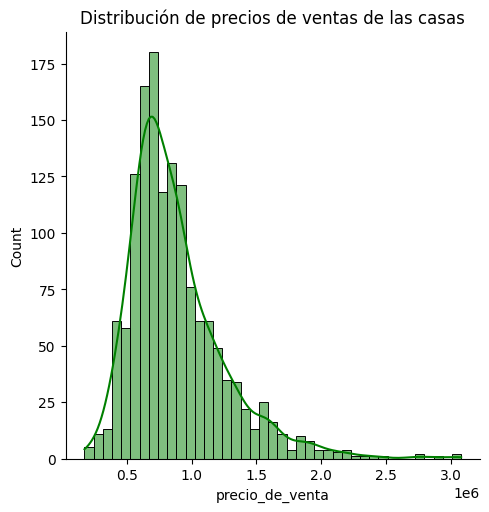

In [91]:
#Quién es nuestra variable de respuesta?
sns.displot(datos['precio_de_venta'],kde=True,color='green')
plt.title('Distribución de precios de ventas de las casas')
plt.show()

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [92]:
# import train_test_split
from sklearn.model_selection import train_test_split

y = datos['precio_de_venta']
X = datos.drop(columns='precio_de_venta')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)#garantizar la reproductibilidad de la segregación de los datos

In [93]:
#Datos de entrenamiento para usar la fórmula
df_train = pd.DataFrame(X_train)
df_train['precio_de_venta'] = y_train
df_train.head()

,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
1303,65.7732,0,0.0000,1,0,0,406725.0
326,55.3684,1,55.3684,1,189,0,384540.0
386,74.6916,1,107.4853,2,560,0,1059950.0
615,103.6764,0,0.0000,1,440,0,788800.0
236,94.2006,1,67.8170,2,457,0,958885.0


In [94]:
# import ols elimina los otliyer y se concentra en los valores mas relacionados
from statsmodels.formula.api import ols

In [95]:
# ajustando el primer modelo
modelo_0 = ols('precio_de_venta ~ area_primer_piso', data=df_train).fit()

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [96]:
# visualizando los parámetros
modelo_0.params

,0
Intercept,152909.288334
area_primer_piso,6793.641641


In [97]:
# El resumen del modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Mon, 30 Jun 2025   Prob (F-statistic):          2.22e-105
Time:                        15:02:21   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [98]:
# observando el R² = indica cuánto de la variabilidad de la variable dependiente (respuesta) es explicada por el modelo de regresión lineal.
modelo_0.rsquared

np.float64(0.37728010994297867)

## Entendiendo el resíduo

In [99]:
# Quiénes son los residuos?
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


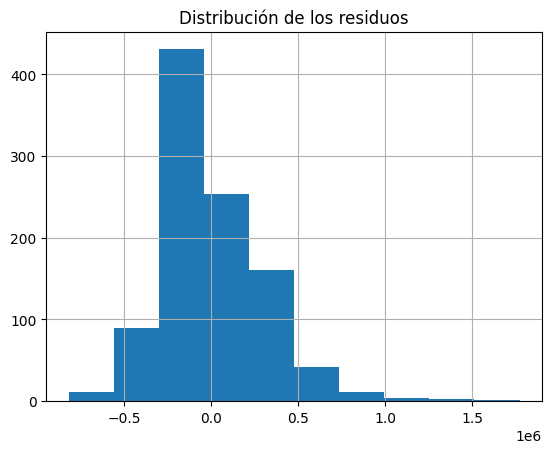

In [100]:
# Cómo están distribuidos - es residuo - la generalizacion del modelo al parametro establecido.
modelo_0.resid.hist()
plt.title('Distribución de los residuos')
plt.show()

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [101]:
# definiendo la 'Y' prevista
y_predict = modelo_0.predict(X_test)

In [102]:
# importando el r2_score
from sklearn.metrics import r2_score

In [103]:
# mostrando el resultado de r²

print('R² de la previsión para los datos del modelo de prueba es:',{round(r2_score(y_test, y_predict),2)} )

R² de la previsión para los datos del modelo de prueba es: {0.39}


# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

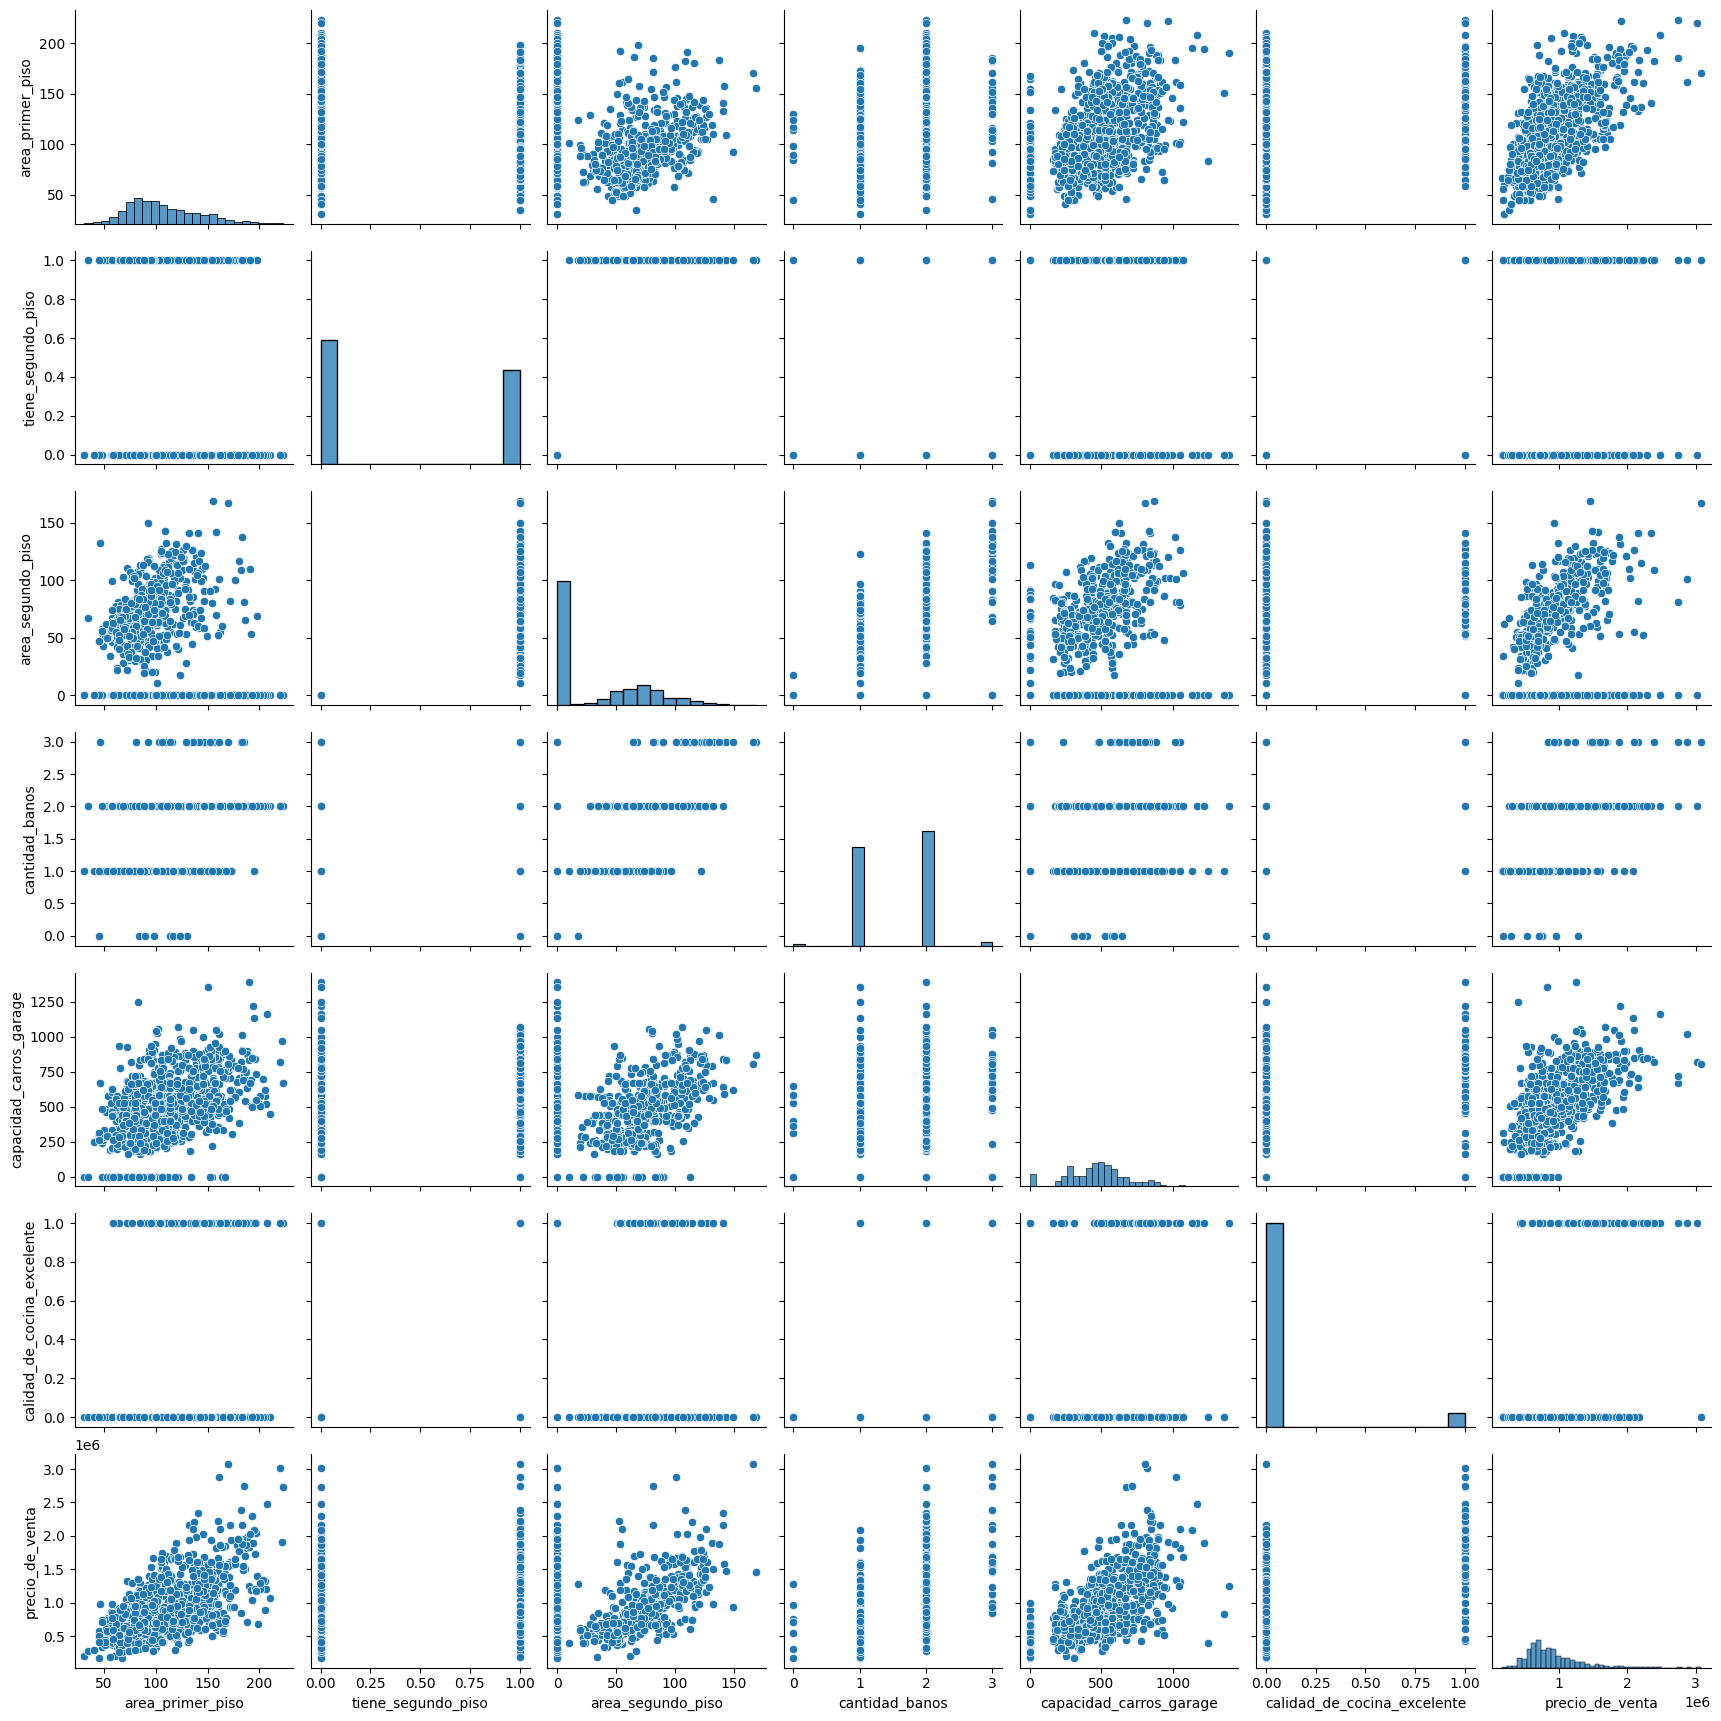

In [104]:
# cuáles otras características podrían explicar el precio de los inmuebles?
sns.pairplot(datos)
plt.show()

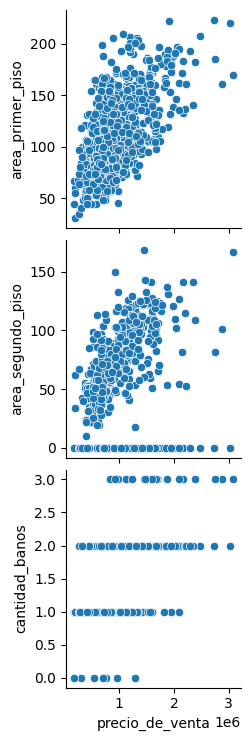

In [105]:
#Vamos a analizar solamente y_vars='precio_de_venta'
sns.pairplot(datos,y_vars=['area_primer_piso', 'area_segundo_piso','cantidad_banos'],x_vars='precio_de_venta')
plt.show()

## Añadiendo factores al modelo

In [106]:
# importando la api de statsmodels para añadir un valor constante para mejorar el valor de intercepcion 0
import statsmodels.api as sm

In [107]:
# Añadiendo una constante
x_train = sm.add_constant(X_train)
x_train.head()

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [108]:
x_train.columns

Index(['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente'],
      dtype='object')

In [109]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_1 = sm.OLS(y_train, x_train[['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()

In [110]:
# Modelo sin el área del segundo piso
modelo_2 = sm.OLS(y_train, x_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()

In [111]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso
modelo_3 = sm.OLS(y_train, x_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos','calidad_de_cocina_excelente']]).fit()

In [112]:
# Resumen del modelos
modelos = [modelo_0, modelo_1, modelo_2, modelo_3]

for i,j in enumerate(modelos):
  print(f'**************************************************************************\n**************** El Modelo {i} Tiene el siguiente resumen*******************:')
  print(j.summary(),'\n\n')

**************************************************************************
**************** El Modelo 0 Tiene el siguiente resumen*******************:
                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Mon, 30 Jun 2025   Prob (F-statistic):          2.22e-105
Time:                        15:02:41   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t

In [113]:
# otra manera de visualizar
for i,j in enumerate(modelos):
  print(f'El coeficiente de determinación para el modelo {i}: {j.rsquared.round(2)}')

El coeficiente de determinación para el modelo 0: 0.38
El coeficiente de determinación para el modelo 1: 0.74
El coeficiente de determinación para el modelo 2: 0.71
El coeficiente de determinación para el modelo 3: 0.65


## Comparando los modelos
Cuál es el modelo?


In [114]:
# Cuántos parámetros tiene el modelo?
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [129]:
# Añadiendo una constante en X_test
x_test = sm.add_constant(X_test)
x_test.head(2)

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
997,1.0,94.9438,0,0.0000,1,280,0
805,1.0,74.1342,1,78.2218,2,595,0


In [131]:
# Previsión con el modelo 3
prevision_3 = modelo_3.predict(x_test[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos','calidad_de_cocina_excelente']])

In [132]:
# Cuál es el r² de la previsión?
print(f'El coeficiente R2 de la base de prevision es: {modelo_3.rsquared.round(2)}')

El coeficiente R2 de la base de prevision es: 0.65


In [134]:
# Cuál es el R² del entrenamiento?
print(f'El coeficiente R2 con respecto a la base de entrenamiento es: {round(r2_score(y_test,prevision_3),2)}')

El coeficiente R2 con respecto a la base de entrenamiento es: 0.64


##**Comparación entre R² de entrenamiento y prueba**

El coeficiente de determinación (R²) es una métrica fundamental en modelos de regresión, ya que indica la proporción de la varianza en la variable de respuesta que es explicada por las variables explicativas. Considerando este contexto, ¿por qué es importante comparar el R² calculado con los datos de entrenamiento y también con los datos de prueba en modelos de regresión? Elige la alternativa correcta.

R: Para determinar si el modelo está sobreajustado a los datos de entrenamiento (overfitting), perdiendo la capacidad de generalización.


Comparar el R² de entrenamiento y prueba ayuda a identificar si el modelo está sobreajustado a los datos de entrenamiento (overfitting), lo que perjudica su capacidad de generalización. Si hay una diferencia muy grande entre los valores de entrenamiento y prueba, puede indicar que el modelo está siendo influenciado por patrones específicos de los datos de entrenamiento que no son generalizables a los datos de prueba.

## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [135]:
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

In [137]:
#Nuevo inmueble
nuevo_inmueble = pd.DataFrame({
    'const':[1],
    'area_primer_piso':[120],
    'tiene_segundo_piso':[1],
    'cantidad_banos':[2],
    'calidad_de_cocina_excelente':[0]
})


In [138]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0? explica el 37% de variacion del precio.
modelo_0.predict(nuevo_inmueble['area_primer_piso']).round(2)

,0
0,968146.29


In [139]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?
modelo_3.predict(nuevo_inmueble).round(2)

,0
0,1123758.24


In [140]:
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [143]:
# Leyendo varias casas?
nuevas_casas = pd.read_csv("/content/nuevas_casas.csv", sep=";")
nuevas_casas.head()

,Casa,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [144]:
nuevas_casas.drop(columns='Casa',inplace=True)

In [145]:
# Añadiendo una constante
nuevas_casas = sm.add_constant(nuevas_casas)
nuevas_casas.head()

,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1.0,150,1,2,1
1,1.0,180,0,3,1
2,1.0,120,1,2,1
3,1.0,200,1,3,1
4,1.0,160,0,2,1


In [148]:
# Cuál es el precio de estas nuevas casas?
nuevas_casas['Precio de Venta'] = modelo_3.predict(nuevas_casas).round(2)
nuevas_casas

,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente,Precio de Venta
0,1.0,150,1,2,1,1751739.07
1,1.0,180,0,3,1,1863057.99
2,1.0,120,1,2,1,1568149.47
3,1.0,200,1,3,1,2206758.02
4,1.0,160,0,2,1,1591628.64
5,1.0,140,1,2,0,1246151.31
6,1.0,170,0,3,0,1357470.23
7,1.0,190,1,2,0,1552133.97
8,1.0,130,0,2,0,963647.81
9,1.0,180,1,3,0,1639973.72


##**Manos a la obra: estimando el valor de una casa**
Recibiste una solicitud para estimar el precio de una casa con las siguientes características:

1 baño
Área 98m²
No tiene segundo piso
Calidad de la cocina excelente

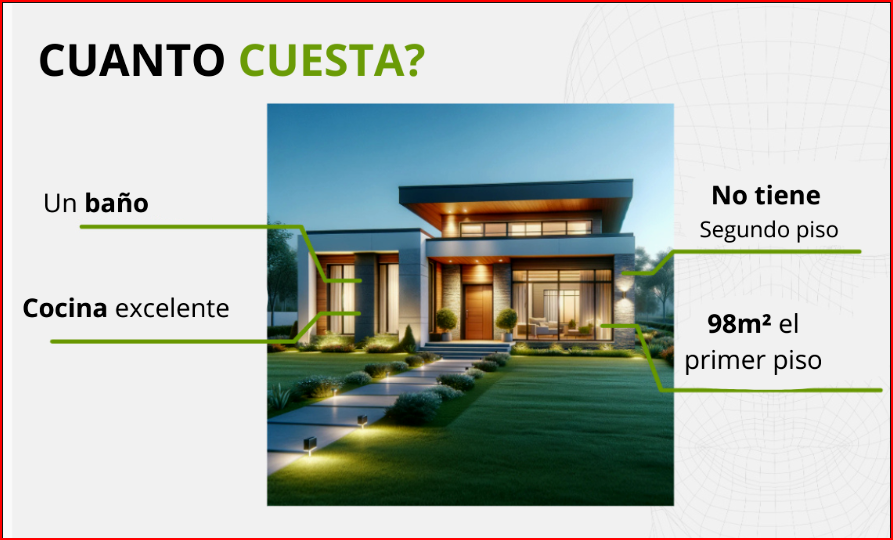

In [151]:
#Para realizar la tasación de una casa con estas características, primero necesitamos crear un DataFrame con cada una de las informaciones,
#almacenando en una variable nuevo_inmueble. Este DataFrame necesita
#la información de constante 1 para que se pueda hacer la predicción con statsmodels:
nuevo_inmueble = pd.DataFrame({'const':[1],
                               'area_primer_piso':[98],
                               'existe_segundo_piso': [0],
                               'cantidad_baños': [1],
                               'calidad_de_la_cocina_Excelente': [1]
                               })

In [152]:
#Si deseamos utilizar un modelo más simplificado, podemos hacer la predicción solo con la información del área de la casa, a partir del modelo_0:
modelo_0.predict(nuevo_inmueble['area_primer_piso'])

,0
0,818686.169194


In [153]:
#Pero si queremos un modelo que tenga en cuenta todas las características disponibles, podemos usar el modelo_3:
modelo_3.predict(nuevo_inmueble)[0]

np.float64(1063173.8519646404)

A partir de esto, es posible obtener el valor de venta del inmueble utilizando los modelos que fueron construidos durante el curso.

# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [157]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [158]:
explicativas_1 = ['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']

explicativas_2 = [['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]

explicativas_3 = [['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'calidad_de_cocina_excelente']]

In [162]:
# VIF 1  Factor de inflacion de la varianza superior a 5 Multicolinearidad
vif_1 = pd.DataFrame()
vif_1['variables'] = explicativas_1
vif_1['VIF'] = [vif(x_train[explicativas_1],i) for i in range(len(explicativas_1))]
vif_1

,variables,VIF
0,const,20.230833
1,area_primer_piso,2.193680
2,tiene_segundo_piso,7.455059
3,area_segundo_piso,7.589396
4,cantidad_banos,1.720795
5,capacidad_carros_garage,1.570078
6,calidad_de_cocina_excelente,1.182606


In [168]:
# VIF 3 identificar la colinearidad para identificar categorias que no afecten la colinearidad
vif_3 = pd.DataFrame()
vif_3['variables'] = explicativas_3[0]
vif_3['VIF'] = [vif(x_train[explicativas_3[0]],i) for i in range(len(explicativas_3[0]))]
vif_3

,variables,VIF
0,const,18.773457
1,area_primer_piso,1.919046
2,tiene_segundo_piso,1.644067
3,cantidad_banos,1.539255
4,calidad_de_cocina_excelente,1.151795


#**Estrategia para la optimización de modelos de regresión**

Ana está analizando la multicolinealidad en su modelo de regresión lineal, que fue construido para predecir los precios de inmuebles en función de varias características. Ella notó que dos variables, "existe_segundo_andar" y "area_segundo_andar", tienen VIFs de 7.455059 y 7.589396, respectivamente. ¿Cuál de las siguientes afirmaciones describe mejor la situación y los pasos que Ana puede tomar para abordar el problema de multicolinealidad?

R 1 : Los VIFs muestran una fuerte evidencia de multicolinealidad. Ana puede considerar combinar ambas en una sola variable.


Combinar ambas características en una sola variable es una posibilidad viable para resolver el problema de la multicolinealidad, pero también tiene desventajas. La principal es la pérdida de interpretabilidad. Al combinar variables, puedes perder la capacidad de entender cómo cada variable original contribuye individualmente a explicar la variable dependiente. Además, no hay garantía de que la combinación de variables resolverá completamente el problema de la multicolinealidad, especialmente si hay múltiples variables altamente correlacionadas que contribuyen a la complejidad del modelo...

R 2: Los VIFs muestran una fuerte evidencia de multicolinealidad. Ana puede considerar eliminar una de las variables para reducir la multicolinealidad.


Los valores de VIF superiores a 5 generalmente indican una fuerte multicolinealidad, sugiriendo que las variables están correlacionadas y pueden influir negativamente en la interpretación de los coeficientes del modelo. Al eliminar o combinar variables correlacionadas, Ana puede mejorar la precisión y la interpretabilidad de su modelo de regresión lineal.

## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

In [170]:
#prevision de los valore de entrenamiento x_traint[explicativas_3]
y_previsto_train = modelo_3.predict(x_train[explicativas_3[0]])

In [171]:
#generando un scater plot entre y_previsto e y_train
fig = px.scatter(x=y_previsto_train, y=y_train, title='Valor previsto V/S Real',
                 labels={'x':'Valor previsto', 'y':'Valor Real'})
fig.show()

In [172]:
#residuos
residuos = modelo_3.resid
fig = px.scatter(x=y_previsto_train, y=y_train, title='Valor previsto V/S Residuos',
                 labels={'x':'Valor previsto', 'y':'Valor Residuos'})
fig.show()

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">

##**Para saber más: estimación de la regresión lineal simple**

La regresión lineal fue la metodología que ajustó la mejor línea que representa linealmente la interacción entre X e Y; en nuestro caso, el tamaño del área del primer piso y el precio de venta de la casa.

Vale la pena repasar cada componente de la regresión lineal:

Función

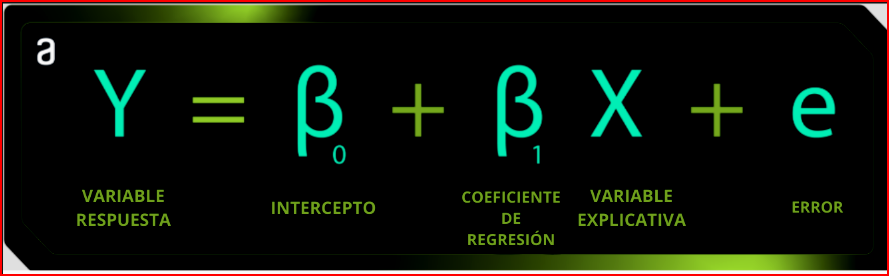

Variable Respuesta (Y): También llamada variable dependiente, es aquella que estamos tratando de predecir.    
Intercepto (β₀): El punto donde la línea de regresión intercepta el eje vertical (Y), es decir, el valor de Y cuando X es igual a 0.     
Variable Explicativa (X): También llamada variable independiente, es el factor que usamos para predecir y explicar la variable respuesta.  
Coeficientes de Regresión (β₁): Impacto de cada variable explicativa X en la variable respuesta, es el efecto de X en Y.  
Error Residual (e): Diferencia entre los valores reales y previstos de la variable respuesta.

##**Para saber más: explicabilidad**

El coeficiente de determinación, frecuentemente llamado R², es una medida estadística que indica cuánto de la variabilidad de la variable dependiente (respuesta) es explicada por el modelo de regresión lineal.

Interpretando el R²  
Varía de 0 a 1, un valor cercano a 1 indica que el modelo se ajusta bien a los datos, explicando la mayor parte de la variación en la variable dependiente/respuesta. Por otro lado, un valor cercano a 0 indica que el modelo no puede explicar mucha variación en la variable dependiente/respuesta.

Usando en la prueba  
Además, el R² puede ser utilizado para comparar el rendimiento del modelo en diferentes conjuntos de datos, como entrenamiento y prueba. Esto ayuda a identificar problemas de sobreajuste (overfitting) o subajuste (underfitting). Idealmente, deseamos que el R² sea consistente entre los conjuntos de entrenamiento y prueba, indicando una buena capacidad de generalización del modelo para nuevos datos.

Fórmula  
Una de las fórmulas del R² puede ser representada por la razón entre la variación explicada y la variación total. Por eso decimos que cuanto más cerca de 1, mejor es la adecuación del modelo, ya que la variación explicada será más cercana a la variación total en esta razón.

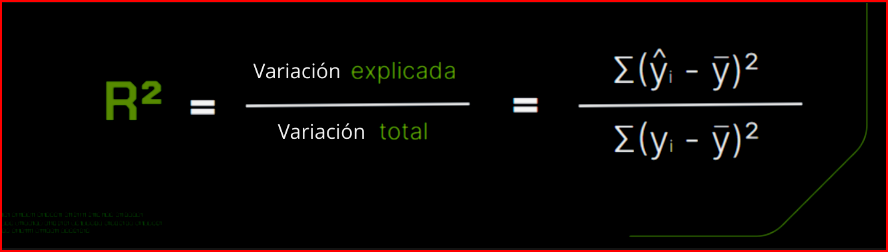

**Hazlo como yo lo hice: analizando la variable respuesta**   
Durante esta clase, nos enfocamos en analizar el comportamiento de la variable respuesta, es decir, comprender el precio de venta de la casa.

Para esto, hicimos un histograma como recurso visual para facilitar este análisis.

##**El papel del R² en la selección del modelo**

En un proyecto de análisis de datos, un científico de datos compara cuatro modelos estadísticos para predecir el precio de las casas. Cada modelo utiliza un conjunto diferente de variables explicativas. El científico observa que los modelos con más variables tienen valores de R² más altos, pero es consciente de que esto puede no ser el único factor para elegir el mejor modelo. Con base en esta situación, ¿cuál de las siguientes afirmaciones es la más adecuada para seleccionar el modelo más apropiado? Elija una alternativa.

R: Prefiera el modelo con el R² ajustado más alto, ya que este tiene en cuenta el número de variables explicativas, ayudando a evitar el sobreajuste.


El R² ajustado es una medida más robusta que el R² simple, ya que penaliza la inclusión de variables que no contribuyen significativamente al modelo. Esto ayuda a equilibrar la complejidad del modelo con su capacidad explicativa, proporcionando una base más sólida para la elección del modelo.

##**Para saber más: refinando la selección de modelos**


En la clase sobre comparación de modelos de regresión lineal, exploramos cómo evaluar y seleccionar el modelo más adecuado utilizando el R² y otros criterios. Además de la selección manual que discutimos, existen métodos automáticos de selección de variables que pueden ser extremadamente útiles en situaciones donde el número de variables explicativas es grande. Estos métodos, como stepwise, backward y forward selection, siguen criterios predefinidos para agregar o eliminar variables del modelo de forma iterativa. Explora a continuación los métodos automáticos de selección de variables, que buscan equilibrar la complejidad del modelo y su capacidad explicativa.

El método de forward selection comienza con un modelo sin variables explicativas y agrega una a una, eligiendo en cada paso la variable que más mejora el modelo de acuerdo con un criterio estadístico específico, como el menor valor de p-valor o el mayor aumento en el R² ajustado.
El backward selection inicia con todas las variables posibles en el modelo y, de manera iterativa, elimina la variable que menos contribuye al modelo, nuevamente basándose en criterios como el p-valor o el impacto en el R² ajustado.
El stepwise selection es una combinación de los dos métodos anteriores, donde las variables pueden ser agregadas o eliminadas en cada paso, dependiendo de su contribución a la mejora del modelo.
Estos métodos de selección automática son herramientas poderosas que ayudan en la identificación del modelo más parsimonioso, es decir, aquel que puede explicar los datos de manera eficiente sin ser excesivamente complejo. Sin embargo, es crucial que el científico de datos comprenda y supervise el proceso, ya que la elección automática puede, a veces, introducir sesgo o sobreajuste, especialmente si el criterio de selección no es bien elegido o si el modelo no es validado adecuadamente con datos nuevos o de prueba.

##**Para saber más: guardando el modelo en un archivo**

Al desarrollar modelos de regresión con Statsmodels, es común querer guardar estos modelos para uso futuro, ya sea para implementación en producción, compartir con otros miembros del equipo o simplemente para respaldo. Una manera conveniente de hacer esto en Python es usando la biblioteca pickle, que permite serializar objetos de Python en archivos y deserializarlos de vuelta a objetos de Python. Esta biblioteca no necesita ser instalada, ya que viene por defecto en Python.

Vamos a explorar cómo guardar un modelo de regresión lineal de Statsmodels con la biblioteca pickle y luego cómo leer el archivo.

Cómo guardar el Modelo con Pickle
Después de entrenar el modelo, podemos guardarlo en un archivo usando la biblioteca pickle. Para ello, es necesario importar la biblioteca y luego podemos usar la función pickle.dump(), indicando el modelo y el archivo como parámetros.

In [155]:
import pickle

# Nombre del archivo donde se guardará el modelo
nombre_archivo = 'modelo_regresion_lineal.pkl'

# Guardar el modelo en un archivo usando pickle
with open(nombre_archivo, 'wb') as archivo:
    pickle.dump(modelo_3, archivo)

**Cargar el Modelo de vuelta con Pickle**  
Después de guardar el modelo, podemos cargarlo de vuelta para uso posterior. Para hacer esto, simplemente usamos el método pickle.load() utilizando el archivo como parámetro de la función.

In [156]:
# Cargar el modelo de vuelta del archivo
with open(nombre_archivo, 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)

A partir de la lectura del archivo, es posible utilizar el modelo para hacer predicciones y verificar métricas de la misma manera que usamos el modelo original.

Para más detalles sobre el uso de la biblioteca pickle, consulte la documentación.[https://docs.python.org/3/library/pickle.html]

#**Para saber más: entendiendo la heterocedasticidad**

Cuando nos sumergimos en el universo del análisis de datos, un concepto fundamental que encontramos con frecuencia es la regresión lineal. Esta técnica nos permite entender relaciones y prever tendencias basándonos en datos existentes. Sin embargo, al aplicar la regresión lineal, es crucial estar atentos a la heterocedasticidad, una característica que puede afectar significativamente la interpretación de los resultados.

¿Qué es la Heterocedasticidad?
La heterocedasticidad es un término utilizado en estadística para describir una situación en la que la varianza de los errores (o residuos) de un modelo de regresión no es constante a lo largo del rango de valores previstos. En términos simples, si la dispersión de los residuos varía en diferentes niveles del predictor, estamos ante la heterocedasticidad. Esto es un problema porque la mayoría de los métodos de regresión lineal asumen homocedasticidad, es decir, que los residuos tienen varianza constante en todos los niveles de los predictores.

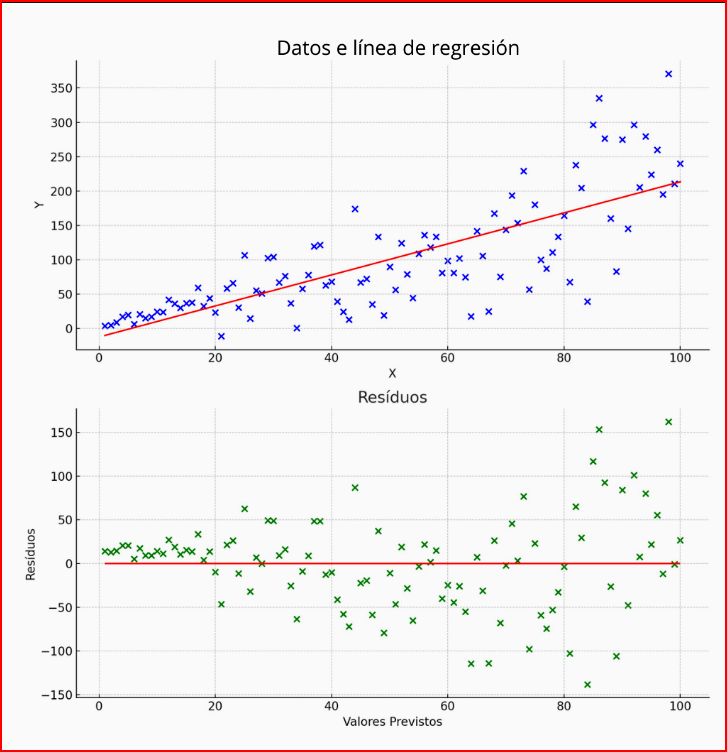

**¿Por qué es un Problema la Heterocedasticidad?**  
La presencia de heterocedasticidad puede llevar a estimaciones de coeficientes ineficientes y a pruebas de hipótesis inválidas, comprometiendo la confiabilidad de las inferencias estadísticas. Aunque no afecta la imparcialidad o la consistencia de los estimadores de mínimos cuadrados ordinarios, impacta en la eficiencia de estos estimadores, haciéndolos menos confiables.

**Identificando la Heterocedasticidad**  
Uno de los métodos más comunes para detectar la heterocedasticidad es a través del análisis visual de los residuos. Después de ajustar un modelo de regresión lineal, podemos graficar los residuos en función de los valores previstos. Si los residuos se dispersan de manera uniforme, sin formar patrones o embudos, el modelo probablemente presenta homocedasticidad. Por otro lado, si la dispersión de los residuos aumenta o disminuye con los valores previstos, esto indica heterocedasticidad.

**¿Cómo Evaluar la Heterocedasticidad?**  
Además de un análisis visual de los residuos, existen varias pruebas estadísticas para evaluar formalmente la presencia de heterocedasticidad, como la prueba de White y la prueba de Breusch-Pagan. Estas pruebas ayudan a cuantificar si la varianza de los residuos está relacionada con los valores previstos, proporcionando una base más sólida para decidir si la heterocedasticidad es una preocupación significativa en el modelo.

**Tratando la Heterocedasticidad**  
Si identificamos heterocedasticidad, se pueden adoptar varias enfoques para abordar el problema, como la transformación de variables (por ejemplo, logarítmica o raíz cuadrada) o el uso de técnicas de regresión robustas, que son menos sensibles a la varianza de los residuos.

**Conclusión**  
Al comprender e identificar la heterocedasticidad, podemos tomar medidas apropiadas para garantizar que nuestros análisis de regresión lineal sean confiables y válidos. Este cuidado nos permite hacer inferencias más precisas y fundamentadas, esenciales para la toma de decisiones basadas en datos.